
#Ecommerce Project

This project about Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Ecommerce Customers csv file from the company has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [0]:
from google.colab import files


In [13]:
uploaded=files.upload()

In [14]:
customers = pd.read_csv('Ecommerce Customers')

FileNotFoundError: ignored

In [15]:
customers.head()

NameError: ignored

In [0]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [11]:
customers.info()

NameError: ignored

## Exploratory Data Analysis


In [10]:
customers.head()

NameError: ignored

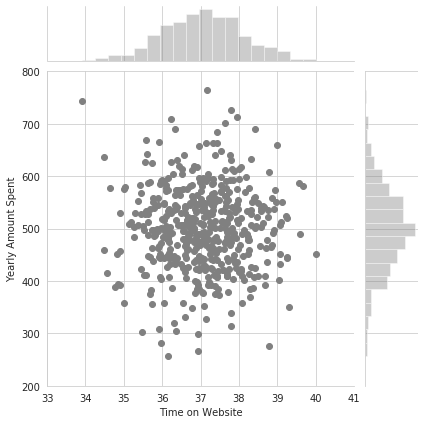

In [0]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers, kind='scatter',color='gray', xlim=(33,41),ylim=(200,800))

**the Time on App 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


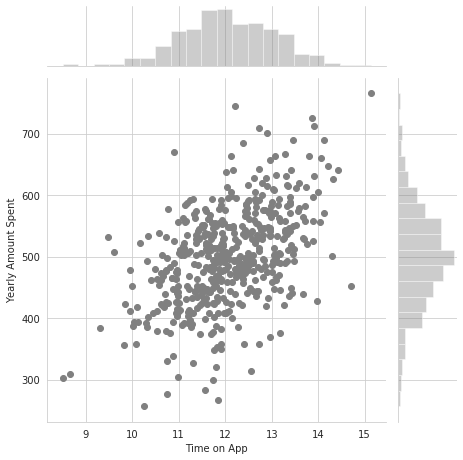

In [0]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, kind='scatter',color='gray', size=6.5)

In [0]:
# There seems to be bigger correlation between time spent on the app and money spent 

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

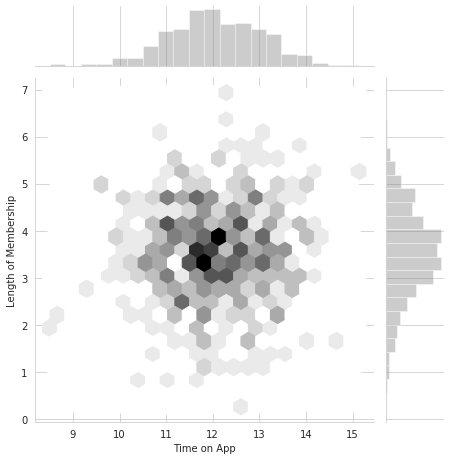

In [0]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers, kind='hex',color='gray', height=6.5)

**explore these types of relationships across the entire data set.

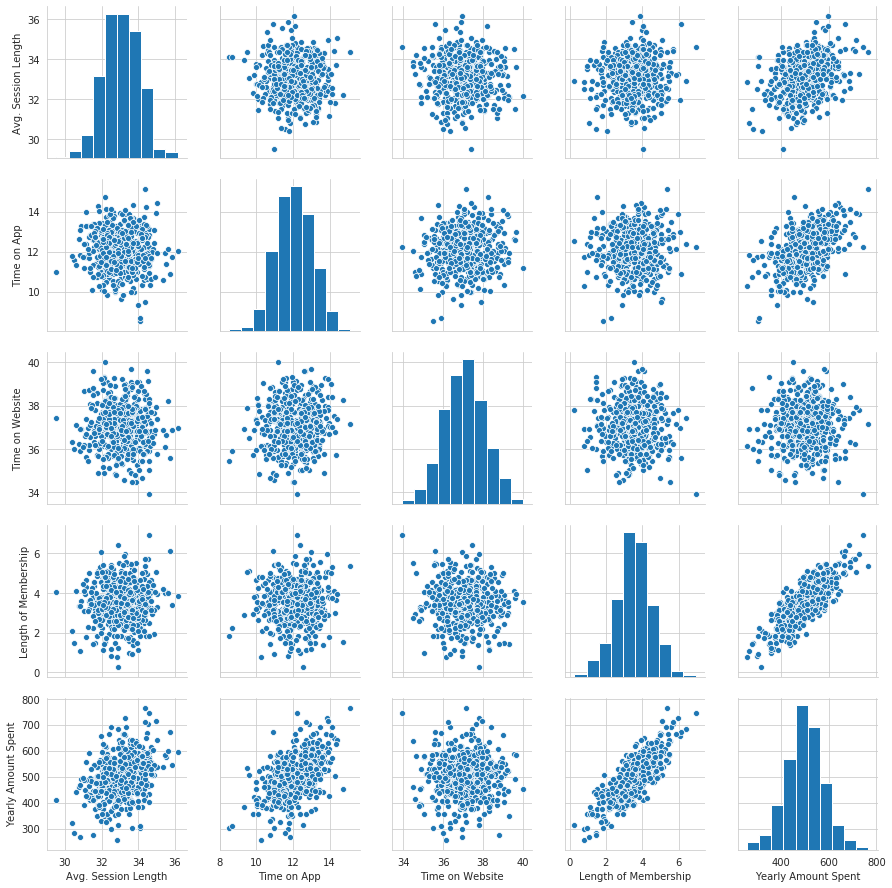

In [0]:
sns.pairplot(customers)

In [0]:
# The most correlated feature seems to be the Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

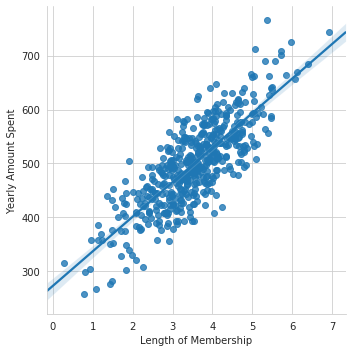

In [0]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data



In [0]:
customers.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


In [0]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!


In [0]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [0]:
lm = LinearRegression() #instantiate model

** Train/fit lm on the training data.**

In [0]:
lm.fit(X_train, y_train)

**Print out the coefficients of the model**

In [0]:
print('Coefficients:')
print(lm.coef_)

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [0]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

In [0]:
plt.scatter(y_test,predictions,s=15,marker='o',c='b')
plt.xlim(200,800)
plt.ylim(200,800)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [0]:
from sklearn import metrics

In [0]:
# Evaluation metrics
# We are predicting yearly amount spent (dlls). Our model differs by 8.93 dlls 

print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 


In [0]:
sns.distplot((y_test-predictions),bins=50, color='gray')


We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development.


In [0]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])
coeff_df

**
Comparing the time on app vs time on website coefficients, we see that the time on app coefficient is way higher than the time on website coefficient. Thus, we can conclude that the company should focus more on their mobile app.**